# Assignment no 6
### Problem Statement   : Creating & Visualizing Neural Network for the given data.
### Name                : Sahil A. Shaikh
### Class               : BE-11
### Roll No             : 43365


## I have used Wine Quality dataset to predict the type of the wine


## Step 1 : Import libraries

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

## Step 2 : Load the dataset

In [23]:
df = pd.read_csv("winequalityN.csv")

- Checking the dataframe

In [24]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


- Checking for the inconsistent data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Step 3 : Data Cleaning / Feature Engineering

In [26]:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].mean())
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].mean())
df['citric acid'] = df['citric acid'].fillna(df['citric acid'].mean())
df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].mean())
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['sulphates'] = df['sulphates'].fillna(df['sulphates'].mean())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [28]:
df['type'] = df['type'].map({'white':0,'red':1})

## Step 4 : Splitting dataset into training and testing data

In [29]:
y = df.type
x = df.drop('type',axis=1)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

## Step 5 : Train Neural Network model and Predict the type of wine

In [31]:
model = tf.keras.models.Sequential()

In [32]:
model.add(tf.keras.layers.Dense(12,input_dim=12,activation='relu'))
model.add(tf.keras.layers.Dense(9,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 117       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(x_train,y_train,epochs=30,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
163/163 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.8805 - val_loss: 0.2251 - val_accuracy: 0.9169
Epoch 2/30
163/163 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9273 - val_loss: 0.2258 - val_accuracy: 0.9231
Epoch 3/30
163/163 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9315 - val_loss: 0.2050 - val_accuracy: 0.9215
Epoch 4/30
163/163 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.9350 - val_loss: 0.1902 - val_accuracy: 0.9315
Epoch 5/30
163/163 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9380 - val_loss: 0.1885 - val_accuracy: 0.9338
Epoch 6/30
163/163 [==============================] - 0s 3ms/step - loss: 0.1688 - accuracy: 0.9407 - val_loss: 0.1722 - val_accuracy: 0.9338
Epoch 7/30
163/163 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.9444 - val_loss: 0.1644 - val_accuracy: 0.9392
Epoch 

In [36]:
#train_prediction = model.predict(x_train.round())
test_prediction = model.predict(x_test.round()).round()
test_prediction = test_prediction.astype("int64")
test_prediction


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_prediction)

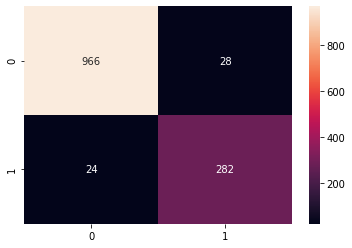

In [38]:
sns.heatmap(cm,annot=True,fmt='g')

In [39]:
loss_curve = history.history['loss']
acc_curve = history.history['accuracy']

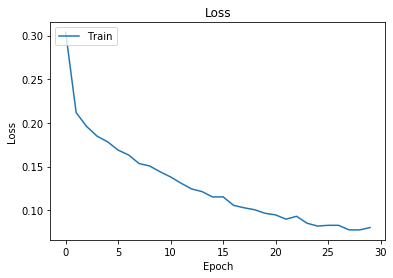

In [40]:
plt.plot(loss_curve,label="Train")
plt.legend(loc="upper left")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

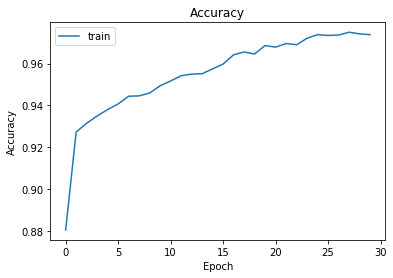

In [41]:
plt.plot(acc_curve,label="train")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [42]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test,test_prediction)
print(clf_report)


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       994
           1       0.91      0.92      0.92       306

    accuracy                           0.96      1300
   macro avg       0.94      0.95      0.94      1300
weighted avg       0.96      0.96      0.96      1300

